In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

### Problem 1

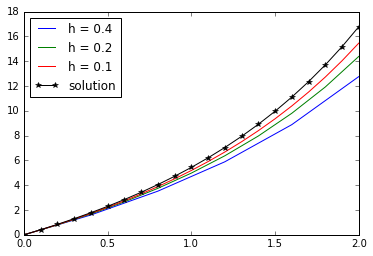

In [2]:
def euler(f, y0, a, b, N):
    h = (b-a)/float(N)
    x = np.linspace(a,b,N+1)
    y = [y0]
    for i, x_i in enumerate(x):
        y.append(y[i] + h*f(x_i, y[i]))
    return x, y[:-1]

f = lambda x,y : y - 2*x + 4
a = 0
b = 2
y0 = 0


ex, ey = euler(f, y0, a, b, (b-a)/0.4)
plt.plot(ex, ey, label="h = 0.4")
ex, ey = euler(f, y0, a, b, (b-a)/0.2)
plt.plot(ex, ey, label="h = 0.2")
ex, ey = euler(f, y0, a, b, (b-a)/0.1)
plt.plot(ex, ey, label="h = 0.1")

plt.plot(ex, -2 + 2*ex + 2*np.exp(ex), 
         color='k', marker="*", label="solution")
plt.legend(loc="upper left")

### Problem 2

In [3]:
def midpoint(f, y0, a, b, N):
    h = (b-a)/float(N)
    x = np.linspace(a,b,N+1)
    y = [y0]
    for i, x_i in enumerate(x):
        y.append(y[i] + h*f(x_i + h/2., y[i] + (h/2.)*f(x_i,y[i])))
    return x, y[:-1]

In [4]:
def rk4(f, y0, a, b, N):
    h = (b-a)/float(N)
    x = np.linspace(a,b,N+1)
    y = [y0]
    for i in xrange(int(N)):
        k1 = f(x[i], y[i])
        k2 = f(x[i] + h/2., y[i] + h/2.*k1)
        k3 = f(x[i] + h/2., y[i] + h/2.*k2)
        k4 = f(x[i+1], y[i] + h*k3)
        y.append(y[i] + h/6.*(k1 + 2*k2 + 2*k3 + k4))
    return x, y

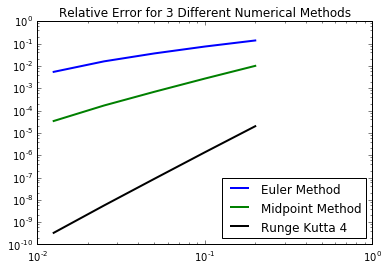

In [6]:
def plot_error(approx, f, y0, a, b):
    # Requires an implementation of the euler method
    
    best_grid = 320
    best_val = approx(f,y0,a,b,best_grid)[1][-1]

    smaller_grids = [10,20,40,80,160] # number of subintervals in smaller grids
    h = [2./N for N in smaller_grids]
    sol = [approx(f,y0,a,b,N)[1][-1] for N in smaller_grids]
    error = [abs(( val - best_val)/best_val ) for val in sol]

    if approx == euler:
        c = "b"
        l = "Euler Method"
    if approx == midpoint:
        c = "g"
        l = "Midpoint Method"
    if approx == rk4:
        c = "k"
        l = "Runge Kutta 4"
    plt.loglog(h, error, '-b', label=l , linewidth=2., color=c)

plot_error(euler, f, y0, a, b)
plot_error(midpoint, f, y0, a, b)
plot_error(rk4, f, y0, a, b)
plt.legend(loc="lower right")
plt.title("Relative Error for 3 Different Numerical Methods")
plt.show()

### Problem 3

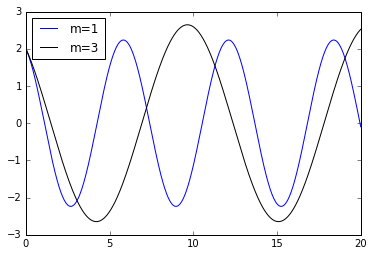

In [16]:
z = lambda x,y : np.array([y[1], -1*float(y[0])])
z2 = lambda x,y : np.array([y[1], -1/3.*float(y[0])])

a,b = 0,20
y0 = np.array([2,-1])
h = 0.01

x1,y1 = rk4(z, y0, a, b, (b-a)/h)
y1 = np.array(y1)
plt.plot(x1,y1[:,0],color='b',label="m=1")
x2,y2 = rk4(z2, y0, a, b, (b-a)/h)
y2 = np.array(y2)
plt.plot(x,y2[:,0],color='k',label="m=3")
plt.legend(loc="upper left")
plt.show()

### Problem 4

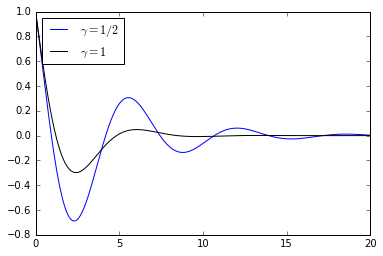

In [19]:
z = lambda x,y : np.array([y[1], -.5*float(y[1]) - float(y[0])])
z2 = lambda x,y : np.array([y[1], -1*float(y[1]) - float(y[0])])

a,b = 0,20
y0 = np.array([1,-1])
h = 0.01

x1,y1 = rk4(z, y0, a, b, (b-a)/h)
y1 = np.array(y1)
plt.plot(x1,y1[:,0],color='b',label="$\gamma=1/2$")
x2,y2 = rk4(z2, y0, a, b, (b-a)/h)
y2 = np.array(y2)
plt.plot(x,y2[:,0],color='k',label="$\gamma=1$")
plt.legend(loc="upper left")
plt.show()

### Problem 5

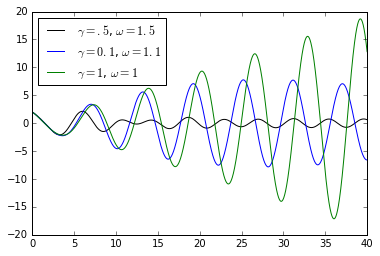

In [23]:
f1 = lambda x,y : np.array([y[1], -.5*.5*float(y[1]) - float(y[0]) + np.cos(1.5*x)])
f2 = lambda x,y : np.array([y[1], -.5*.1*float(y[1]) - float(y[0]) + np.cos(1.1*x)])
f3 = lambda x,y : np.array([y[1], -.5*0*float(y[1]) - float(y[0]) + np.cos(1*x)])

a,b = 0,40
y0 = np.array([2,-1])
h = 0.01

x1,y1 = rk4(f1, y0, a, b, (b-a)/h)
y1 = np.array(y1)
plt.plot(x1,y1[:,0],color='k',label="$\gamma=.5$, $\omega=1.5$")
x2,y2 = rk4(f2, y0, a, b, (b-a)/h)
y2 = np.array(y2)
plt.plot(x2,y2[:,0],color='b',label="$\gamma=0.1$, $\omega=1.1$")
x3,y3 = rk4(f3, y0, a, b, (b-a)/h)
y3 = np.array(y3)
plt.plot(x3,y3[:,0],color='g',label="$\gamma=1$, $\omega=1$")
plt.legend(loc="upper left")
plt.show()

In [1]:
import numpy as np

def rk4(f, y0, a, b, N):
    h = (b-a)/float(N)
    x = np.linspace(a,b,N+1)
    y = [y0]
    for i in xrange(int(N)):
        k1 = f(x[i], y[i])
        k2 = f(x[i] + h/2., y[i] + h/2.*k1)
        k3 = f(x[i] + h/2., y[i] + h/2.*k2)
        k4 = f(x[i+1], y[i] + h*k3)
        y.append(y[i] + h/6.*(k1 + 2*k2 + 2*k3 + k4))
    return x, y

lambda f
